<a href="https://colab.research.google.com/github/RamonRossaDePaula/Data_Science/blob/main/Applied_Exercises_Ch_4_ISLR2_Ramon_de_Paula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 13

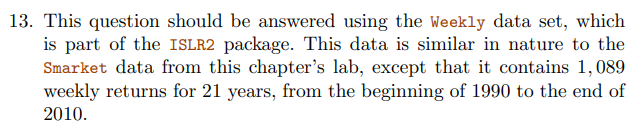

In [10]:
install.packages("ISLR2")       # An Introduction to Statistical Learning 2 
install.packages("tidyverse")   # for data science
install.packages("caret")       # Classification And REgression Training
install.packages("modelr")      # for modeling
install.packages("corrplot") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
library(ISLR2)
library(tidyverse)
library(caret)
library(modelr)
library(corrplot)

lda <- MASS::lda
qda <- MASS::qda

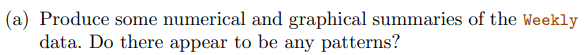

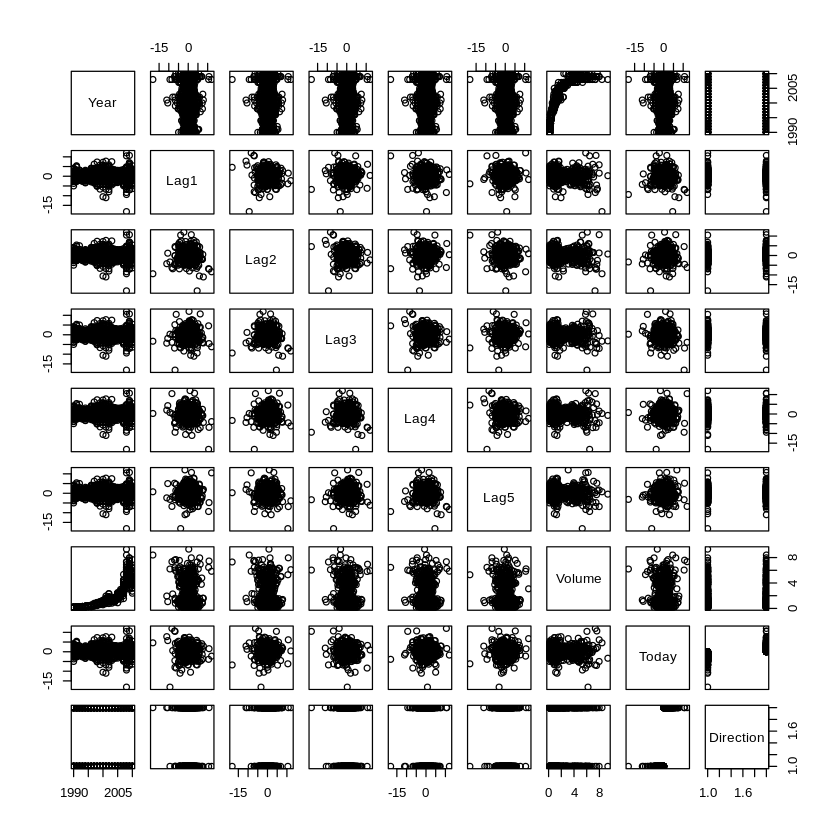

In [5]:
plot(Weekly)

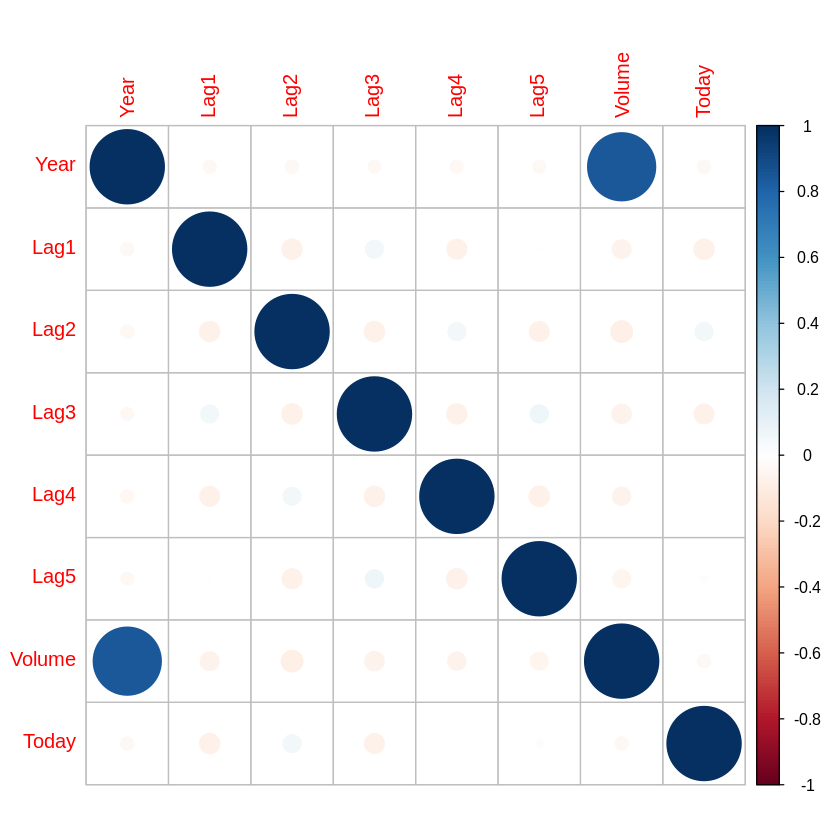

In [6]:
Weekly %>%                              # Assignment operator
  select_if(is.numeric) %>%
  cor() %>% 
  corrplot::corrplot()

In principle, no, but it seems that over the years there has been an increase in volume, which may be associated with the more extreme values for the Today returns.

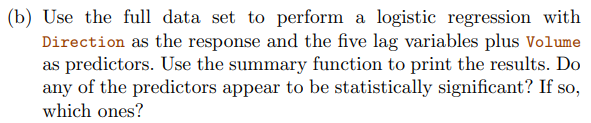

In [7]:
log_reg_weekly <- 
  glm(Direction ~ . - Today, data = Weekly, family = "binomial")

summary(log_reg_weekly)


Call:
glm(formula = Direction ~ . - Today, family = "binomial", data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7071  -1.2578   0.9941   1.0873   1.4665  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) 17.225822  37.890522   0.455   0.6494  
Year        -0.008500   0.018991  -0.448   0.6545  
Lag1        -0.040688   0.026447  -1.538   0.1239  
Lag2         0.059449   0.026970   2.204   0.0275 *
Lag3        -0.015478   0.026703  -0.580   0.5622  
Lag4        -0.027316   0.026485  -1.031   0.3024  
Lag5        -0.014022   0.026409  -0.531   0.5955  
Volume       0.003256   0.068836   0.047   0.9623  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.2  on 1081  degrees of freedom
AIC: 1502.2

Number of Fisher Scoring iterations: 4


Just **Lag2** is statistically significant.

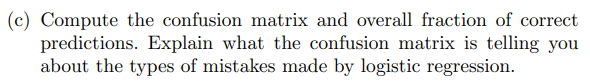

In [8]:
actual_direction <- Weekly[["Direction"]]
predicted_direction <- 
  ifelse(predict(log_reg_weekly, type = "response")  > 0.5, 
         "Up", "Down") %>% 
  factor(levels = c("Down", "Up"))

caret::confusionMatrix(data = predicted_direction, 
                       reference = actual_direction)

Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down   56  47
      Up    428 558
                                          
               Accuracy : 0.5638          
                 95% CI : (0.5338, 0.5935)
    No Information Rate : 0.5556          
    P-Value [Acc > NIR] : 0.3024          
                                          
                  Kappa : 0.0413          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.11570         
            Specificity : 0.92231         
         Pos Pred Value : 0.54369         
         Neg Pred Value : 0.56592         
             Prevalence : 0.44444         
         Detection Rate : 0.05142         
   Detection Prevalence : 0.09458         
      Balanced Accuracy : 0.51901         
                                          
       'Positive' Class : Down            
                           

The confusion matrix show us the Type I Error (positive class predicted, but the true condition is negative: 47), with the False Positive Rate of 7.7% (47÷[47+558]) and the Type II Error (negative class predicted, but the true condition is positive: 428) with the False Negative Rate of 88.4% (428÷[428+56]).

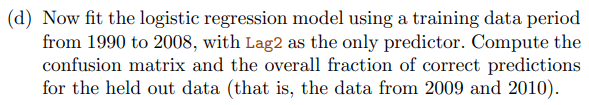

In [13]:
train_weekly <- Weekly %>% 
  filter(between(Year, 1990, 2008))

test_weekly <- Weekly %>% 
  filter(between(Year, 2009, 2010))

reg_upto2008 <- 
  glm(Direction ~ Lag2, data = train_weekly, family = "binomial")

add_pred_direction <- function(df, model) {
  df %>% 
  add_predictions(model, type = "response") %>% 
  mutate(pred_direction = ifelse(
    pred > 0.5,
    "Up",
    "Down"
  ),
  pred_direction = factor(pred_direction, levels = c("Down", "Up")))
}

test_weekly_reg <- 
  test_weekly %>% 
  add_pred_direction(reg_upto2008)

caret::confusionMatrix(data = test_weekly_reg[["pred_direction"]],
                       reference = test_weekly_reg[["Direction"]])

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    9  5
      Up     34 56
                                         
               Accuracy : 0.625          
                 95% CI : (0.5247, 0.718)
    No Information Rate : 0.5865         
    P-Value [Acc > NIR] : 0.2439         
                                         
                  Kappa : 0.1414         
                                         
 Mcnemar's Test P-Value : 7.34e-06       
                                         
            Sensitivity : 0.20930        
            Specificity : 0.91803        
         Pos Pred Value : 0.64286        
         Neg Pred Value : 0.62222        
             Prevalence : 0.41346        
         Detection Rate : 0.08654        
   Detection Prevalence : 0.13462        
      Balanced Accuracy : 0.56367        
                                         
       'Positive' Class : Down           
                                         

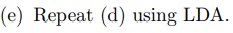

In [14]:
lda_upto2008 <- 
  MASS::lda(Direction ~ Lag2, data = train_weekly)

test_weekly_lda <- 
  test_weekly %>% 
  mutate(pred_direction = 
           predict(lda_upto2008, 
                   newdata = test_weekly, 
                   type = "response")[["class"]])

caret::confusionMatrix(data = test_weekly_lda[["pred_direction"]],
                       reference = test_weekly_lda[["Direction"]])

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    9  5
      Up     34 56
                                         
               Accuracy : 0.625          
                 95% CI : (0.5247, 0.718)
    No Information Rate : 0.5865         
    P-Value [Acc > NIR] : 0.2439         
                                         
                  Kappa : 0.1414         
                                         
 Mcnemar's Test P-Value : 7.34e-06       
                                         
            Sensitivity : 0.20930        
            Specificity : 0.91803        
         Pos Pred Value : 0.64286        
         Neg Pred Value : 0.62222        
             Prevalence : 0.41346        
         Detection Rate : 0.08654        
   Detection Prevalence : 0.13462        
      Balanced Accuracy : 0.56367        
                                         
       'Positive' Class : Down           
                                         

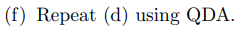

In [15]:
qda_upto2008 <- 
  MASS::qda(Direction ~ Lag2, data = train_weekly)

test_weekly_qda <- 
  test_weekly %>% 
  mutate(pred_direction = 
           predict(qda_upto2008, 
                   newdata = test_weekly, 
                   type = "response")[["class"]])

caret::confusionMatrix(data = test_weekly_qda[["pred_direction"]],
                       reference = test_weekly_qda[["Direction"]])

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    0  0
      Up     43 61
                                          
               Accuracy : 0.5865          
                 95% CI : (0.4858, 0.6823)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.5419          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1.504e-10       
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.5865          
             Prevalence : 0.4135          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : Down            
                              

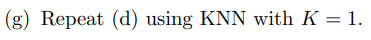

In [16]:
train_x_weekly <- 
  train_weekly %>%
  select(Lag2)

train_y_weekly <- 
  train_weekly[["Direction"]]

test_x_weekly <- 
  test_weekly %>% 
  select(Lag2)

knn_upto2008 <- class::knn(
  train = train_x_weekly,
  test = test_x_weekly,
  cl = train_y_weekly,
  k = 1
)

caret::confusionMatrix(
  data = knn_upto2008,
  reference = test_weekly[["Direction"]]
)

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   21 30
      Up     22 31
                                          
               Accuracy : 0.5             
                 95% CI : (0.4003, 0.5997)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.9700          
                                          
                  Kappa : -0.0033         
                                          
 Mcnemar's Test P-Value : 0.3317          
                                          
            Sensitivity : 0.4884          
            Specificity : 0.5082          
         Pos Pred Value : 0.4118          
         Neg Pred Value : 0.5849          
             Prevalence : 0.4135          
         Detection Rate : 0.2019          
   Detection Prevalence : 0.4904          
      Balanced Accuracy : 0.4983          
                                          
       'Positive' Class : Down            
                              

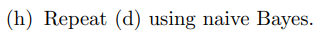

In [35]:
library (e1071)

nb_upto2008 <- 
  naiveBayes(Direction ~ Lag2, data = train_weekly)

test_weekly_nb <- 
  test_weekly %>% 
  mutate(pred_direction = 
           predict(nb_upto2008, newdata = test_weekly, type = "class"))

caret::confusionMatrix(data = test_weekly_nb[["pred_direction"]],
                       reference = test_weekly_nb[["Direction"]])

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    0  0
      Up     43 61
                                          
               Accuracy : 0.5865          
                 95% CI : (0.4858, 0.6823)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.5419          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1.504e-10       
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.5865          
             Prevalence : 0.4135          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : Down            
                              

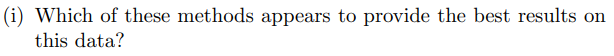

LDA and the Logistic Regression has better results than QDA and KNN with K=1.

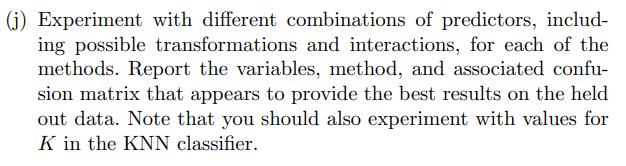

Logistic Regression



In [37]:
reg2_upto2008 <- 
  glm(Direction ~ Lag1 + Lag2 + Volume, 
      data = train_weekly, family = "binomial")

reg3_upto2008 <- 
  glm(Direction ~ Lag1 + Lag2, 
      data = train_weekly, family = "binomial")

reg4_upto2008 <- 
  glm(Direction ~ Lag1 + Lag2 + Lag3 + Volume, 
      data = train_weekly, family = "binomial")

reg5_upto2008 <- 
  glm(Direction ~ Lag1 + Lag2 + Lag3 + Volume, 
      data = train_weekly, family = "binomial")

reg6_upto2008 <- 
  glm(Direction ~ Lag1 + Lag2 + Lag3 + Volume + I(Volume)^2, 
      data = train_weekly, family = "binomial")

reg7_upto2008 <- 
  glm(Direction ~ Lag1 + Lag2*Volume + Lag3, 
      data = train_weekly, family = "binomial")

test_weekly_reg <- 
  test_weekly_reg %>%
  add_predictions(reg2_upto2008, var = "pred_reg2", type = "response") %>%
  add_predictions(reg3_upto2008, var = "pred_reg3", type = "response") %>%
  add_predictions(reg4_upto2008, var = "pred_reg4", type = "response") %>%
  add_predictions(reg4_upto2008, var = "pred_reg5", type = "response") %>%
  add_predictions(reg4_upto2008, var = "pred_reg6", type = "response") %>%
  add_predictions(reg4_upto2008, var = "pred_reg7", type = "response") %>%
  mutate_at(vars(starts_with("pred_reg")),
            ~ factor(ifelse(. > 0.5,
                            "Up",
                            "Down"), levels = c("Down", "Up")))


caret::confusionMatrix(data = test_weekly_reg[["pred_reg2"]],
                       reference = test_weekly_reg[["Direction"]])

caret::confusionMatrix(data = test_weekly_reg[["pred_reg3"]],
                       reference = test_weekly_reg[["Direction"]])

caret::confusionMatrix(data = test_weekly_reg[["pred_reg4"]],
                       reference = test_weekly_reg[["Direction"]])

caret::confusionMatrix(data = test_weekly_reg[["pred_reg5"]],
                       reference = test_weekly_reg[["Direction"]])

caret::confusionMatrix(data = test_weekly_reg[["pred_reg6"]],
                       reference = test_weekly_reg[["Direction"]])
                       
caret::confusionMatrix(data = test_weekly_reg[["pred_reg7"]],
                       reference = test_weekly_reg[["Direction"]])

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   27 33
      Up     16 28
                                          
               Accuracy : 0.5288          
                 95% CI : (0.4285, 0.6275)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.90168         
                                          
                  Kappa : 0.0821          
                                          
 Mcnemar's Test P-Value : 0.02227         
                                          
            Sensitivity : 0.6279          
            Specificity : 0.4590          
         Pos Pred Value : 0.4500          
         Neg Pred Value : 0.6364          
             Prevalence : 0.4135          
         Detection Rate : 0.2596          
   Detection Prevalence : 0.5769          
      Balanced Accuracy : 0.5435          
                                          
       'Positive' Class : Down            
                              

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    7  8
      Up     36 53
                                          
               Accuracy : 0.5769          
                 95% CI : (0.4761, 0.6732)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.6193          
                                          
                  Kappa : 0.035           
                                          
 Mcnemar's Test P-Value : 4.693e-05       
                                          
            Sensitivity : 0.16279         
            Specificity : 0.86885         
         Pos Pred Value : 0.46667         
         Neg Pred Value : 0.59551         
             Prevalence : 0.41346         
         Detection Rate : 0.06731         
   Detection Prevalence : 0.14423         
      Balanced Accuracy : 0.51582         
                                          
       'Positive' Class : Down            
                              

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   30 37
      Up     13 24
                                          
               Accuracy : 0.5192          
                 95% CI : (0.4191, 0.6183)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.931618        
                                          
                  Kappa : 0.0842          
                                          
 Mcnemar's Test P-Value : 0.001143        
                                          
            Sensitivity : 0.6977          
            Specificity : 0.3934          
         Pos Pred Value : 0.4478          
         Neg Pred Value : 0.6486          
             Prevalence : 0.4135          
         Detection Rate : 0.2885          
   Detection Prevalence : 0.6442          
      Balanced Accuracy : 0.5456          
                                          
       'Positive' Class : Down            
                              

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   30 37
      Up     13 24
                                          
               Accuracy : 0.5192          
                 95% CI : (0.4191, 0.6183)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.931618        
                                          
                  Kappa : 0.0842          
                                          
 Mcnemar's Test P-Value : 0.001143        
                                          
            Sensitivity : 0.6977          
            Specificity : 0.3934          
         Pos Pred Value : 0.4478          
         Neg Pred Value : 0.6486          
             Prevalence : 0.4135          
         Detection Rate : 0.2885          
   Detection Prevalence : 0.6442          
      Balanced Accuracy : 0.5456          
                                          
       'Positive' Class : Down            
                              

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   30 37
      Up     13 24
                                          
               Accuracy : 0.5192          
                 95% CI : (0.4191, 0.6183)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.931618        
                                          
                  Kappa : 0.0842          
                                          
 Mcnemar's Test P-Value : 0.001143        
                                          
            Sensitivity : 0.6977          
            Specificity : 0.3934          
         Pos Pred Value : 0.4478          
         Neg Pred Value : 0.6486          
             Prevalence : 0.4135          
         Detection Rate : 0.2885          
   Detection Prevalence : 0.6442          
      Balanced Accuracy : 0.5456          
                                          
       'Positive' Class : Down            
                              

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   30 37
      Up     13 24
                                          
               Accuracy : 0.5192          
                 95% CI : (0.4191, 0.6183)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.931618        
                                          
                  Kappa : 0.0842          
                                          
 Mcnemar's Test P-Value : 0.001143        
                                          
            Sensitivity : 0.6977          
            Specificity : 0.3934          
         Pos Pred Value : 0.4478          
         Neg Pred Value : 0.6486          
             Prevalence : 0.4135          
         Detection Rate : 0.2885          
   Detection Prevalence : 0.6442          
      Balanced Accuracy : 0.5456          
                                          
       'Positive' Class : Down            
                              

LDA:



In [41]:
lda2_upto2008 <- 
  lda(Direction ~ Lag1 + Lag2 + Volume, 
      data = train_weekly)

lda3_upto2008 <- 
  lda(Direction ~ Lag1 + Lag2, 
      data = train_weekly)

lda4_upto2008 <- 
  lda(Direction ~ Lag1 + Lag2 + Lag3 + Volume, 
      data = train_weekly)

lda5_upto2008 <- 
  lda(Direction ~ Lag1 + Lag2 + Lag3 + Volume, 
      data = train_weekly)

lda6_upto2008 <- 
  lda(Direction ~ Lag1 + Lag2 + Lag3 + Volume + I(Volume)^2, 
      data = train_weekly)
    
lda7_upto2008 <- 
  lda(Direction ~ Lag1 + Lag2*Volume + Lag3, 
      data = train_weekly)

conf_matrix_lda <- function(lda_model) {
  pred_class <- 
    predict(lda_model, test_weekly)[["class"]]
  
  caret::confusionMatrix(data = pred_class,
                         reference = test_weekly[["Direction"]])
}

conf_matrix_lda(lda2_upto2008)

conf_matrix_lda(lda3_upto2008)

conf_matrix_lda(lda4_upto2008)

conf_matrix_lda(lda5_upto2008)

conf_matrix_lda(lda6_upto2008)

conf_matrix_lda(lda7_upto2008)

Warning message in lda.default(x, grouping, ...):
“variables are collinear”


Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   27 33
      Up     16 28
                                          
               Accuracy : 0.5288          
                 95% CI : (0.4285, 0.6275)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.90168         
                                          
                  Kappa : 0.0821          
                                          
 Mcnemar's Test P-Value : 0.02227         
                                          
            Sensitivity : 0.6279          
            Specificity : 0.4590          
         Pos Pred Value : 0.4500          
         Neg Pred Value : 0.6364          
             Prevalence : 0.4135          
         Detection Rate : 0.2596          
   Detection Prevalence : 0.5769          
      Balanced Accuracy : 0.5435          
                                          
       'Positive' Class : Down            
                              

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    7  8
      Up     36 53
                                          
               Accuracy : 0.5769          
                 95% CI : (0.4761, 0.6732)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.6193          
                                          
                  Kappa : 0.035           
                                          
 Mcnemar's Test P-Value : 4.693e-05       
                                          
            Sensitivity : 0.16279         
            Specificity : 0.86885         
         Pos Pred Value : 0.46667         
         Neg Pred Value : 0.59551         
             Prevalence : 0.41346         
         Detection Rate : 0.06731         
   Detection Prevalence : 0.14423         
      Balanced Accuracy : 0.51582         
                                          
       'Positive' Class : Down            
                              

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   30 37
      Up     13 24
                                          
               Accuracy : 0.5192          
                 95% CI : (0.4191, 0.6183)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.931618        
                                          
                  Kappa : 0.0842          
                                          
 Mcnemar's Test P-Value : 0.001143        
                                          
            Sensitivity : 0.6977          
            Specificity : 0.3934          
         Pos Pred Value : 0.4478          
         Neg Pred Value : 0.6486          
             Prevalence : 0.4135          
         Detection Rate : 0.2885          
   Detection Prevalence : 0.6442          
      Balanced Accuracy : 0.5456          
                                          
       'Positive' Class : Down            
                              

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   30 37
      Up     13 24
                                          
               Accuracy : 0.5192          
                 95% CI : (0.4191, 0.6183)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.931618        
                                          
                  Kappa : 0.0842          
                                          
 Mcnemar's Test P-Value : 0.001143        
                                          
            Sensitivity : 0.6977          
            Specificity : 0.3934          
         Pos Pred Value : 0.4478          
         Neg Pred Value : 0.6486          
             Prevalence : 0.4135          
         Detection Rate : 0.2885          
   Detection Prevalence : 0.6442          
      Balanced Accuracy : 0.5456          
                                          
       'Positive' Class : Down            
                              

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   30 37
      Up     13 24
                                          
               Accuracy : 0.5192          
                 95% CI : (0.4191, 0.6183)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.931618        
                                          
                  Kappa : 0.0842          
                                          
 Mcnemar's Test P-Value : 0.001143        
                                          
            Sensitivity : 0.6977          
            Specificity : 0.3934          
         Pos Pred Value : 0.4478          
         Neg Pred Value : 0.6486          
             Prevalence : 0.4135          
         Detection Rate : 0.2885          
   Detection Prevalence : 0.6442          
      Balanced Accuracy : 0.5456          
                                          
       'Positive' Class : Down            
                              

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   30 36
      Up     13 25
                                          
               Accuracy : 0.5288          
                 95% CI : (0.4285, 0.6275)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.901684        
                                          
                  Kappa : 0.0996          
                                          
 Mcnemar's Test P-Value : 0.001673        
                                          
            Sensitivity : 0.6977          
            Specificity : 0.4098          
         Pos Pred Value : 0.4545          
         Neg Pred Value : 0.6579          
             Prevalence : 0.4135          
         Detection Rate : 0.2885          
   Detection Prevalence : 0.6346          
      Balanced Accuracy : 0.5538          
                                          
       'Positive' Class : Down            
                              

QDA:

In [42]:
qda2_upto2008 <- 
  qda(Direction ~ Lag1 + Lag2 + Volume, 
      data = train_weekly)

qda3_upto2008 <- 
  qda(Direction ~ Lag1 + Lag2, 
      data = train_weekly)

qda4_upto2008 <- 
  qda(Direction ~ Lag1 + Lag2 + Lag3 + Volume, 
      data = train_weekly)

qda5_upto2008 <- 
  qda(Direction ~ Lag1 + Lag2 + Lag3 + Volume, 
      data = train_weekly)

qda6_upto2008 <- 
  qda(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Volume , 
      data = train_weekly)

qda7_upto2008 <- 
  qda(Direction ~ Lag1 + Lag2*Volume + Lag3, 
      data = train_weekly)

map(
  list(
    qda2_upto2008,
    qda3_upto2008,
    qda4_upto2008,
    qda5_upto2008,
    qda6_upto2008,
    qda7_upto2008
  ),
  conf_matrix_lda
)

[[1]]
Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   31 44
      Up     12 17
                                         
               Accuracy : 0.4615         
                 95% CI : (0.3633, 0.562)
    No Information Rate : 0.5865         
    P-Value [Acc > NIR] : 0.9962         
                                         
                  Kappa : -3e-04         
                                         
 Mcnemar's Test P-Value : 3.435e-05      
                                         
            Sensitivity : 0.7209         
            Specificity : 0.2787         
         Pos Pred Value : 0.4133         
         Neg Pred Value : 0.5862         
             Prevalence : 0.4135         
         Detection Rate : 0.2981         
   Detection Prevalence : 0.7212         
      Balanced Accuracy : 0.4998         
                                         
       'Positive' Class : Down           
                                         

[

KNN:

In [43]:
conf_matrix_knn <- function(k) {
  class::knn(
    train = train_x_weekly,
    test = test_x_weekly,
    cl = train_y_weekly,
    k = k
  ) %>%
    caret::confusionMatrix(data = .,
                           reference = test_weekly[["Direction"]])
  
}

map(2:15, conf_matrix_knn)

[[1]]
Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   18 29
      Up     25 32
                                          
               Accuracy : 0.4808          
                 95% CI : (0.3817, 0.5809)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.9885          
                                          
                  Kappa : -0.056          
                                          
 Mcnemar's Test P-Value : 0.6831          
                                          
            Sensitivity : 0.4186          
            Specificity : 0.5246          
         Pos Pred Value : 0.3830          
         Neg Pred Value : 0.5614          
             Prevalence : 0.4135          
         Detection Rate : 0.1731          
   Detection Prevalence : 0.4519          
      Balanced Accuracy : 0.4716          
                                          
       'Positive' Class : Down            
                        

# Question 14

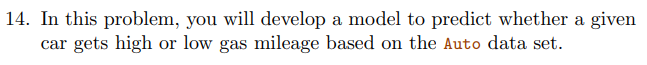

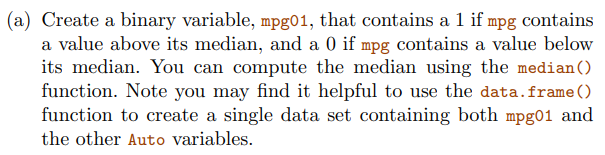

In [44]:
Auto <- Auto %>%
  mutate(mpg01 = factor(ifelse(mpg > median(mpg),
                               1, 0)))

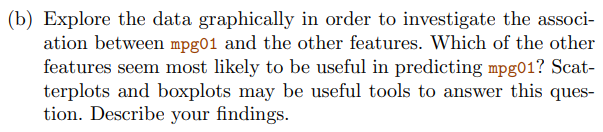

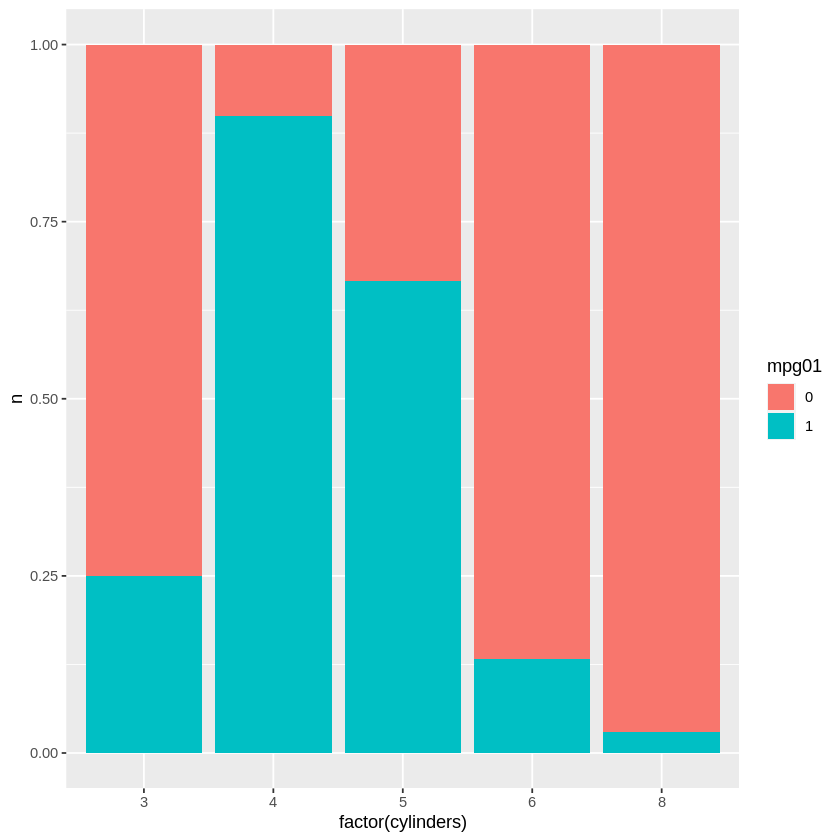

In [45]:
Auto %>%
  count(cylinders, mpg01) %>% 
  ggplot(aes(factor(cylinders), n, fill = mpg01)) +
  geom_col(position = position_fill())

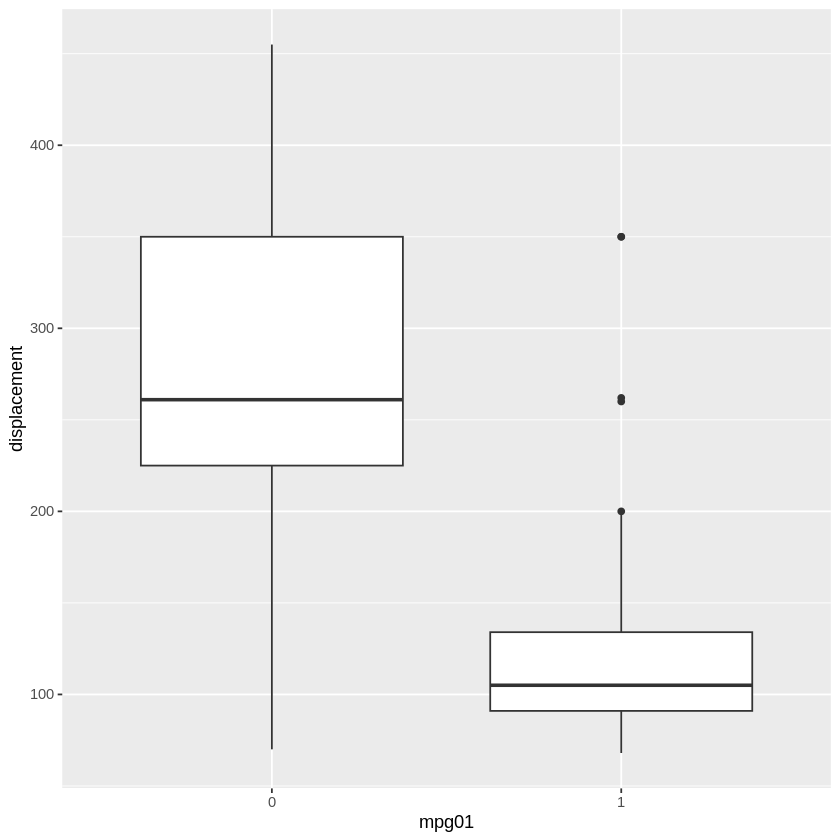

In [46]:
ggplot(Auto, aes(mpg01, displacement)) +
  geom_boxplot()

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


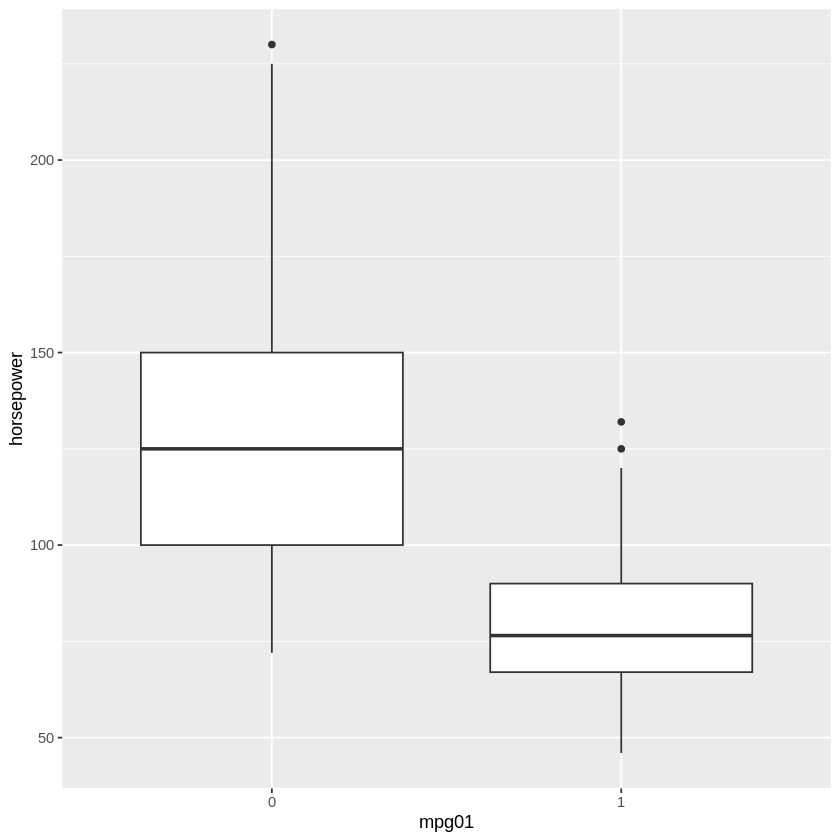

In [47]:
qplot(mpg01, horsepower, data = Auto, geom = "boxplot")

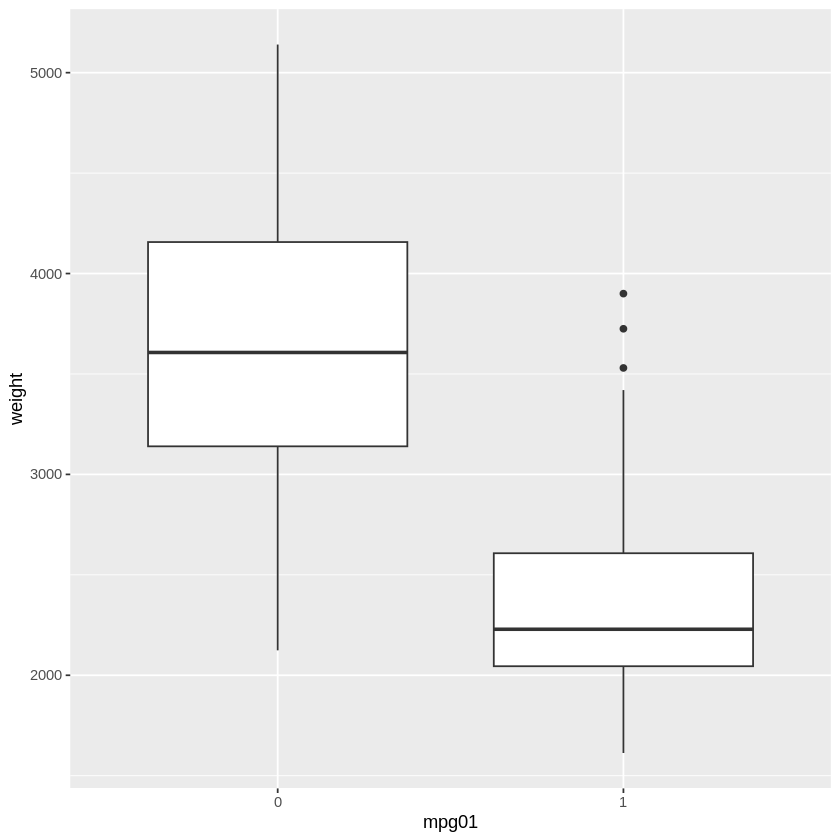

In [48]:
qplot(mpg01, weight, data = Auto, geom = "boxplot")

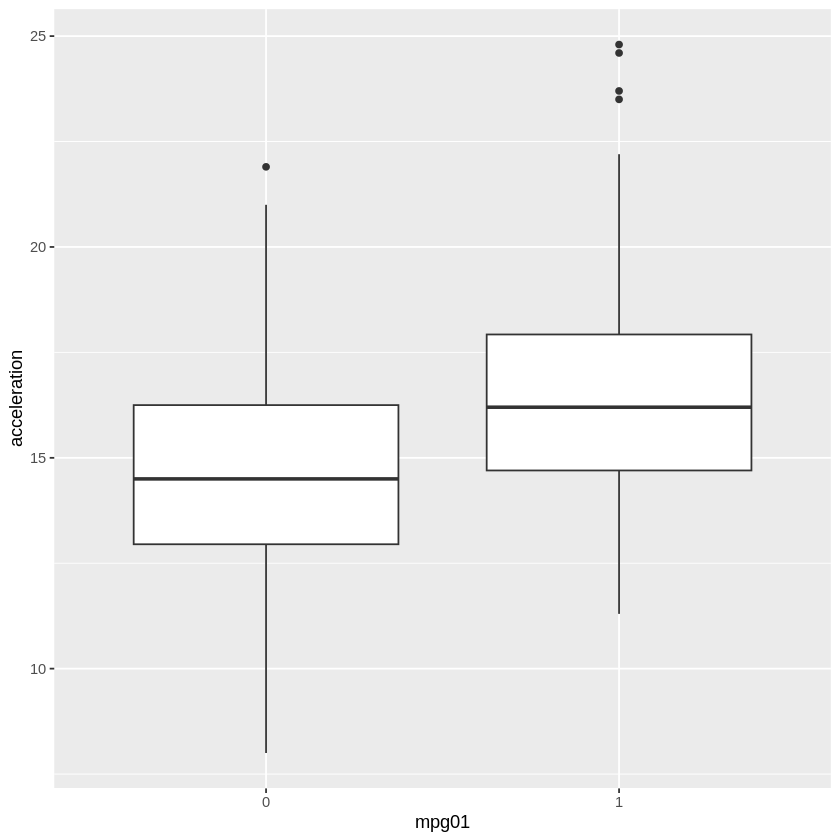

In [49]:
qplot(mpg01, acceleration, data = Auto, geom = "boxplot")

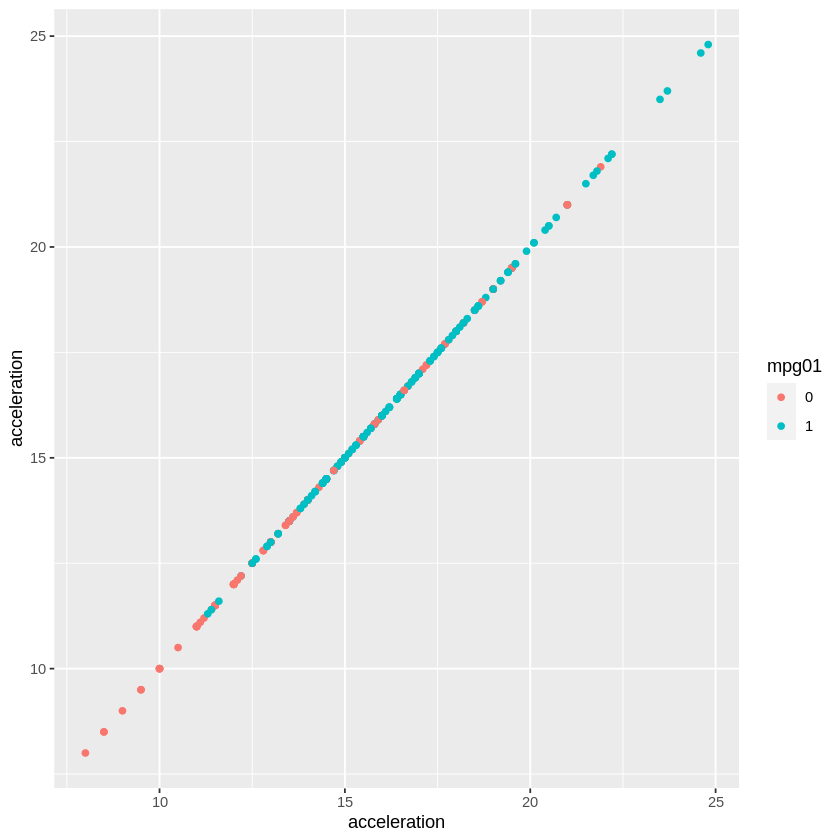

In [50]:
ggplot(Auto, aes(acceleration, acceleration, color = mpg01)) +
  geom_point() 

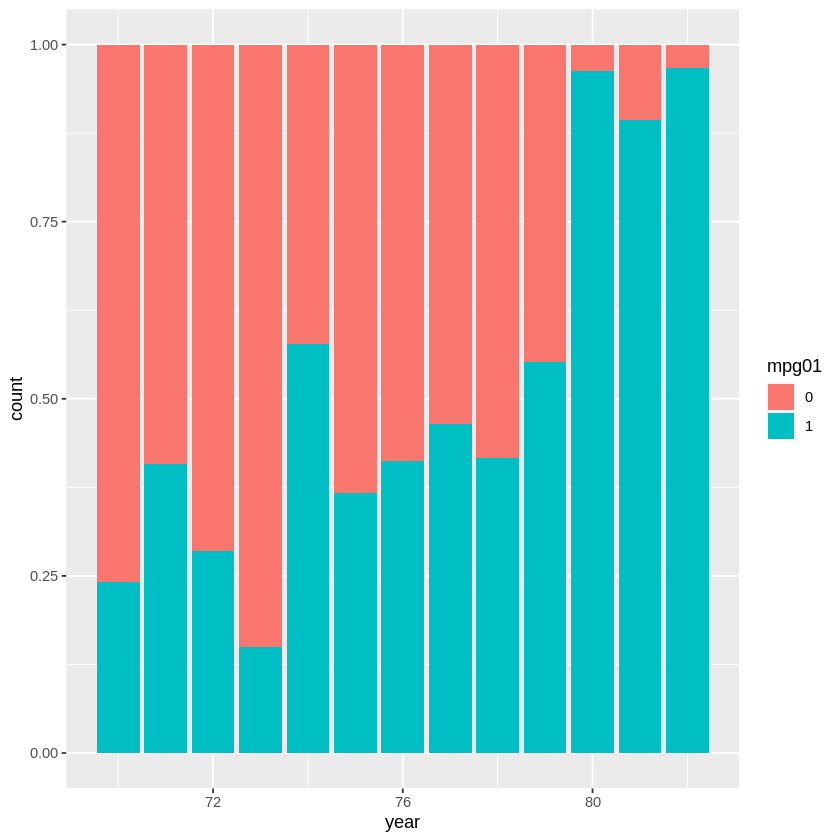

In [51]:
ggplot(Auto, aes(year, fill = mpg01)) +
  geom_bar(position = position_fill())

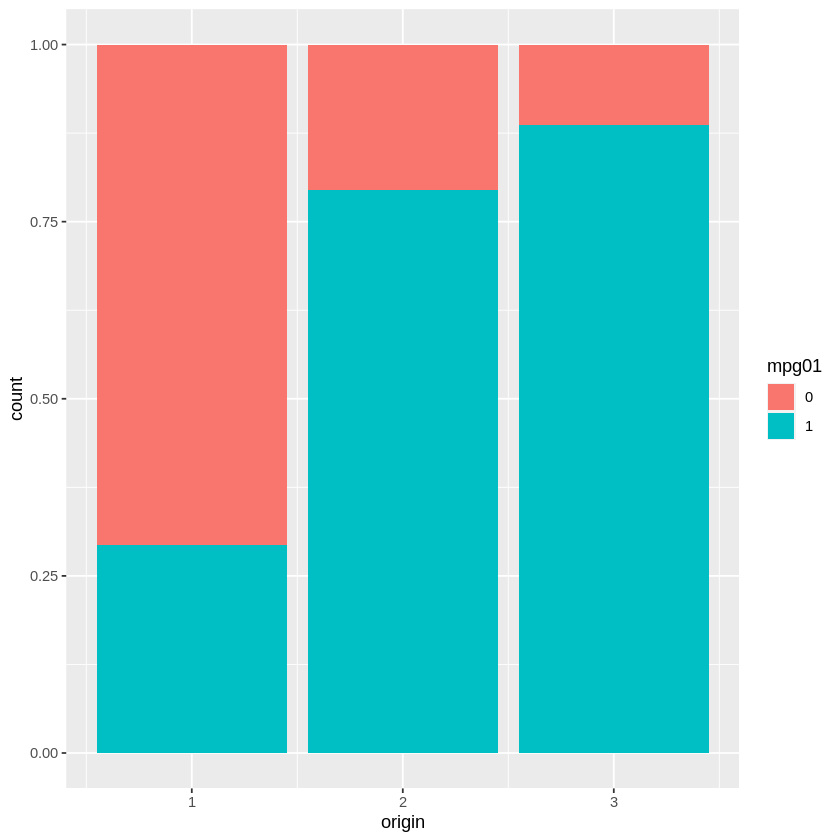

In [52]:
ggplot(Auto, aes(origin, fill = mpg01)) +
  geom_bar(position = position_fill())

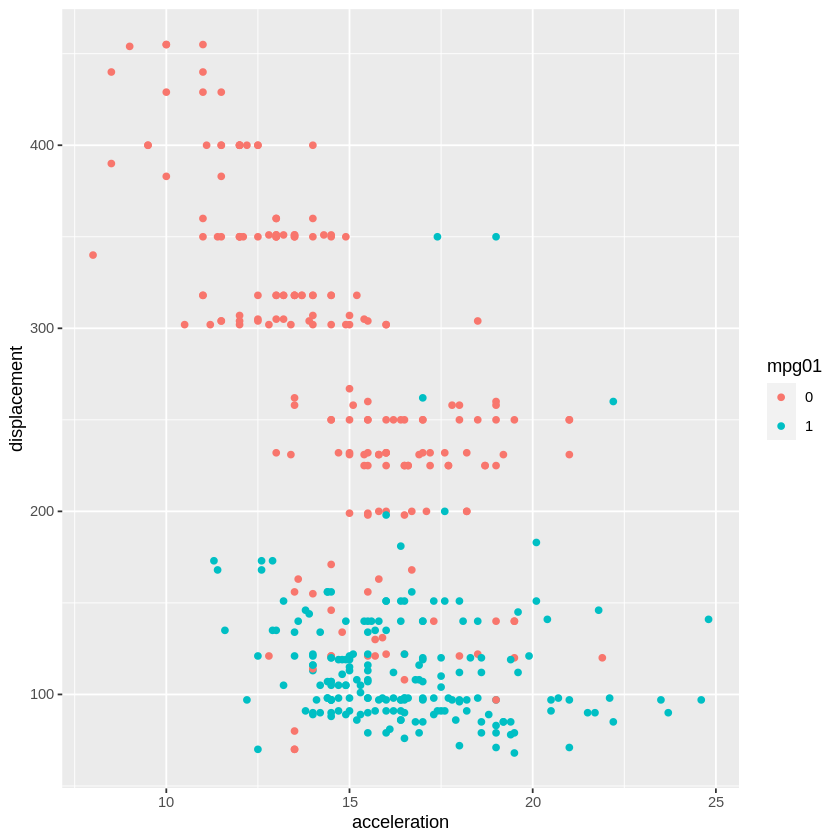

In [53]:
ggplot(Auto, aes(acceleration, displacement, color = mpg01)) +
  geom_point() 

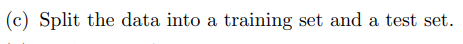

In [54]:
train_auto <- Auto %>% 
  sample_frac(size = 0.5)
  
test_auto <- Auto %>% 
  anti_join(train_auto)

Joining with `by = join_by(mpg, cylinders, displacement, horsepower, weight,
acceleration, year, origin, name, mpg01)`


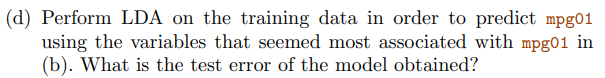

In [55]:
auto_lda <- 
  lda(mpg01 ~ year + acceleration + displacement + weight + horsepower + origin + cylinders,
      data = train_auto)

predictions_auto_lda <- 
  predict(auto_lda, newdata = test_auto)[["class"]]

caret::confusionMatrix(data = predictions_auto_lda,
                       reference = test_auto[["mpg01"]])

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 88  3
         1 13 92
                                          
               Accuracy : 0.9184          
                 95% CI : (0.8708, 0.9526)
    No Information Rate : 0.5153          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8371          
                                          
 Mcnemar's Test P-Value : 0.02445         
                                          
            Sensitivity : 0.8713          
            Specificity : 0.9684          
         Pos Pred Value : 0.9670          
         Neg Pred Value : 0.8762          
             Prevalence : 0.5153          
         Detection Rate : 0.4490          
   Detection Prevalence : 0.4643          
      Balanced Accuracy : 0.9199          
                                          
       'Positive' Class : 0               
                                    

Error rate ~ 8.2%



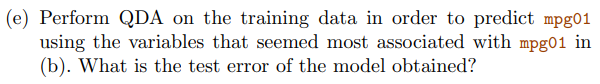

In [56]:
auto_qda <- 
  qda(mpg01 ~ year + acceleration + displacement + weight + horsepower + origin + cylinders,
      data = train_auto)

predictions_auto_qda <- 
  predict(auto_qda, newdata = test_auto)[["class"]]

caret::confusionMatrix(data = predictions_auto_qda,
                       reference = test_auto[["mpg01"]])

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 91  9
         1 10 86
                                          
               Accuracy : 0.9031          
                 95% CI : (0.8528, 0.9406)
    No Information Rate : 0.5153          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.806           
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9010          
            Specificity : 0.9053          
         Pos Pred Value : 0.9100          
         Neg Pred Value : 0.8958          
             Prevalence : 0.5153          
         Detection Rate : 0.4643          
   Detection Prevalence : 0.5102          
      Balanced Accuracy : 0.9031          
                                          
       'Positive' Class : 0               
                                    

Error rate ~ 9.7%



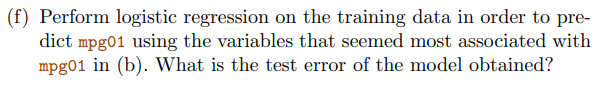

In [57]:
auto_reg <- 
  glm(mpg01 ~ year + acceleration + displacement + weight + horsepower + origin + cylinders,
      data = train_auto,
      family = "binomial")

predictions_auto_reg <- 
  predict(auto_reg, newdata = test_auto, type = "response") %>% 
  map_int(~ifelse(. > 0.5, 1L, 0L)) %>% 
  factor()

caret::confusionMatrix(data = predictions_auto_reg,
                       reference = test_auto[["mpg01"]])

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 87  5
         1 14 90
                                          
               Accuracy : 0.9031          
                 95% CI : (0.8528, 0.9406)
    No Information Rate : 0.5153          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8065          
                                          
 Mcnemar's Test P-Value : 0.06646         
                                          
            Sensitivity : 0.8614          
            Specificity : 0.9474          
         Pos Pred Value : 0.9457          
         Neg Pred Value : 0.8654          
             Prevalence : 0.5153          
         Detection Rate : 0.4439          
   Detection Prevalence : 0.4694          
      Balanced Accuracy : 0.9044          
                                          
       'Positive' Class : 0               
                                    

Error rate ~ 9.7%




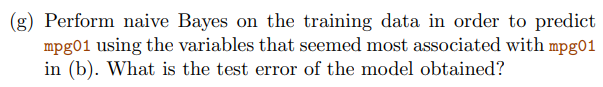

In [59]:
auto_nb <- 
  naiveBayes(mpg01 ~ year + acceleration + displacement + weight + horsepower + origin + cylinders,
      data = train_auto)

predictions_auto_nb <- 
  predict(auto_nb, newdata = test_auto, type = "class")

caret::confusionMatrix(data = predictions_auto_nb,
                       reference = test_auto[["mpg01"]])

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 90  7
         1 11 88
                                          
               Accuracy : 0.9082          
                 95% CI : (0.8587, 0.9447)
    No Information Rate : 0.5153          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8164          
                                          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 0.8911          
            Specificity : 0.9263          
         Pos Pred Value : 0.9278          
         Neg Pred Value : 0.8889          
             Prevalence : 0.5153          
         Detection Rate : 0.4592          
   Detection Prevalence : 0.4949          
      Balanced Accuracy : 0.9087          
                                          
       'Positive' Class : 0               
                                    

Error rate ~ 9.2%

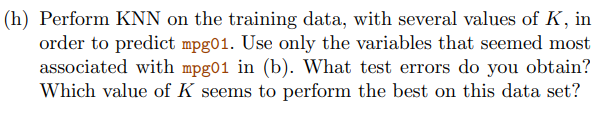

In [ ]:
train_x_auto <-
  train_auto %>%
  select(year,
         acceleration,
         displacement,
         weight,
         horsepower,
         origin,
         cylinders) %>% 
  mutate_all(scale)

test_x_auto <-
  test_auto %>%
  select(year,
         acceleration,
         displacement,
         weight,
         horsepower,
         origin,
         cylinders) %>% 
  mutate_all(scale)

train_y_auto <- train_auto[["mpg01"]]

knn_auto <- function(k) {
  class::knn(
    train = train_x_auto,
    test = test_x_auto,
    cl = train_y_auto,
    k = k
  ) %>% 
    
  caret::confusionMatrix(data = .,
                       reference = test_auto[["mpg01"]])

}

map(1:15, knn_auto)

[[1]]
Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 84 11
         1  5 96
                                          
               Accuracy : 0.9184          
                 95% CI : (0.8708, 0.9526)
    No Information Rate : 0.5459          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8363          
                                          
 Mcnemar's Test P-Value : 0.2113          
                                          
            Sensitivity : 0.9438          
            Specificity : 0.8972          
         Pos Pred Value : 0.8842          
         Neg Pred Value : 0.9505          
             Prevalence : 0.4541          
         Detection Rate : 0.4286          
   Detection Prevalence : 0.4847          
      Balanced Accuracy : 0.9205          
                                          
       'Positive' Class : 0               
                              

# Question 15

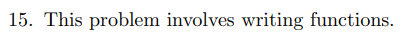

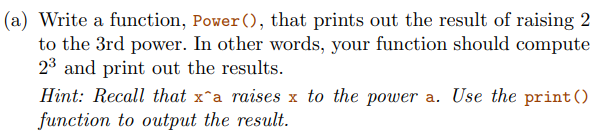

In [ ]:
Power <- function() {
  print(2^3)
}

Power()

[1] 8


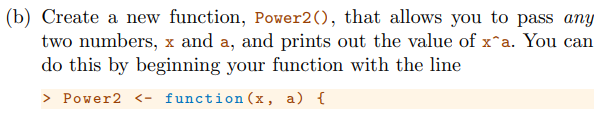

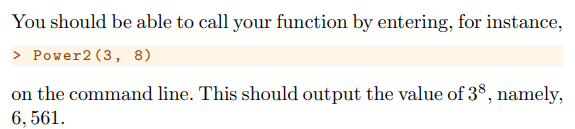

In [ ]:
Power2 <- function(x, a) {
  print(x^a)
}

Power2(3, 8)

[1] 6561


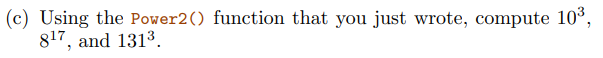

In [ ]:
Power2(10, 3)

[1] 1000


In [ ]:
Power2(8, 17)

[1] 2.2518e+15


In [ ]:
Power2(131, 3)

[1] 2248091


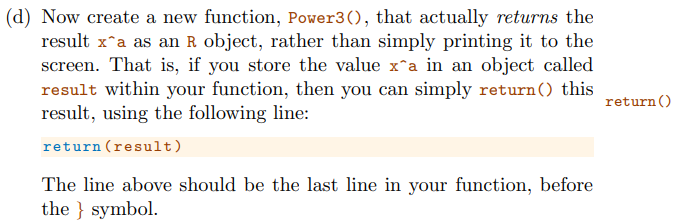

In [ ]:
Power3 <- function(x, a) {
  result <- x^a
  
  result
}

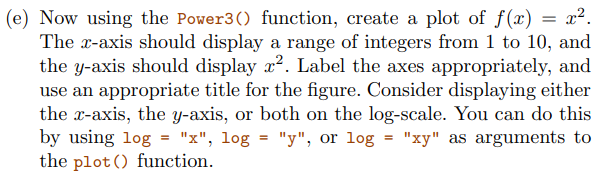

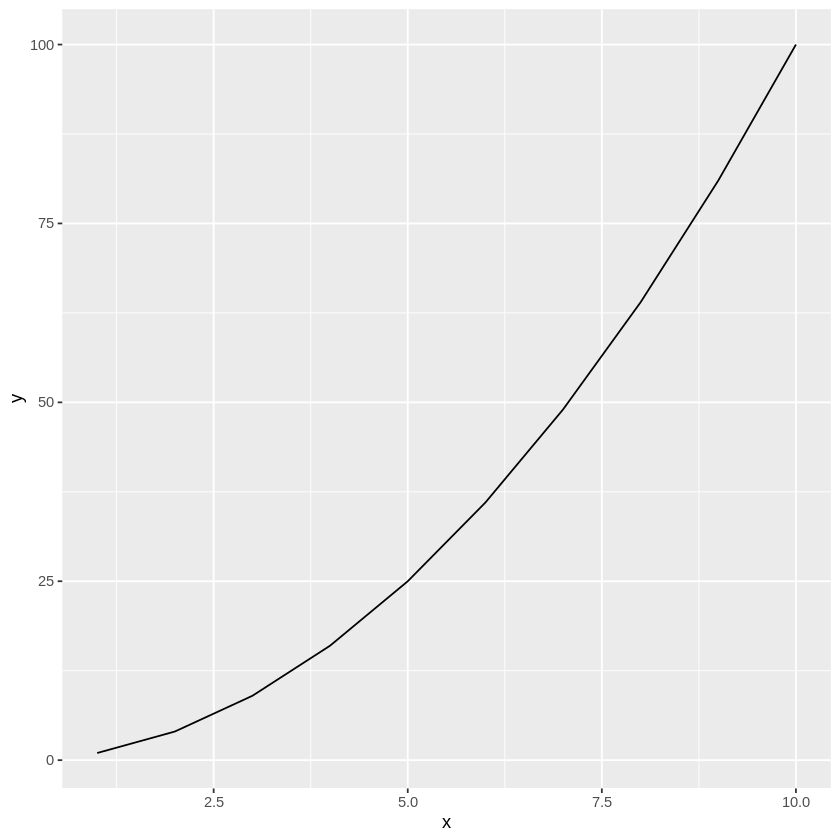

In [ ]:
plot_data <- 
  tibble(
    x = 1:10,
    y = Power3(x, 2)
  )

ggplot(plot_data, aes(x, y)) +
  geom_line()

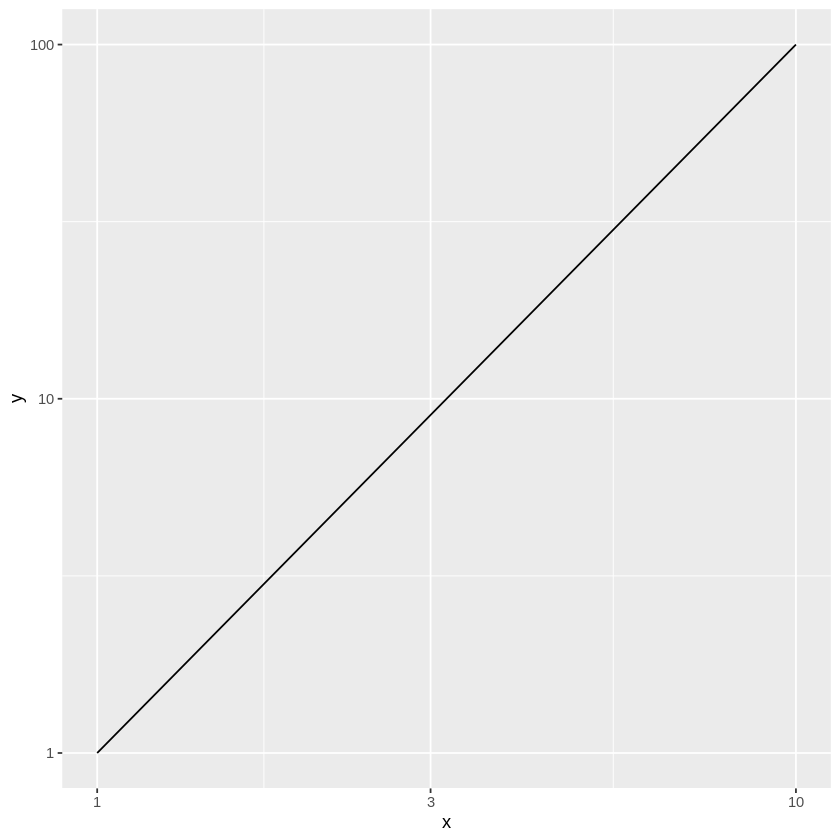

In [ ]:
ggplot(plot_data, aes(x, y)) +
  geom_line() +
  scale_y_log10() +
  scale_x_log10()

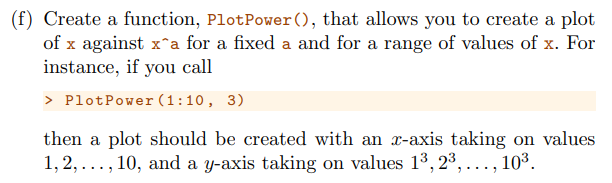

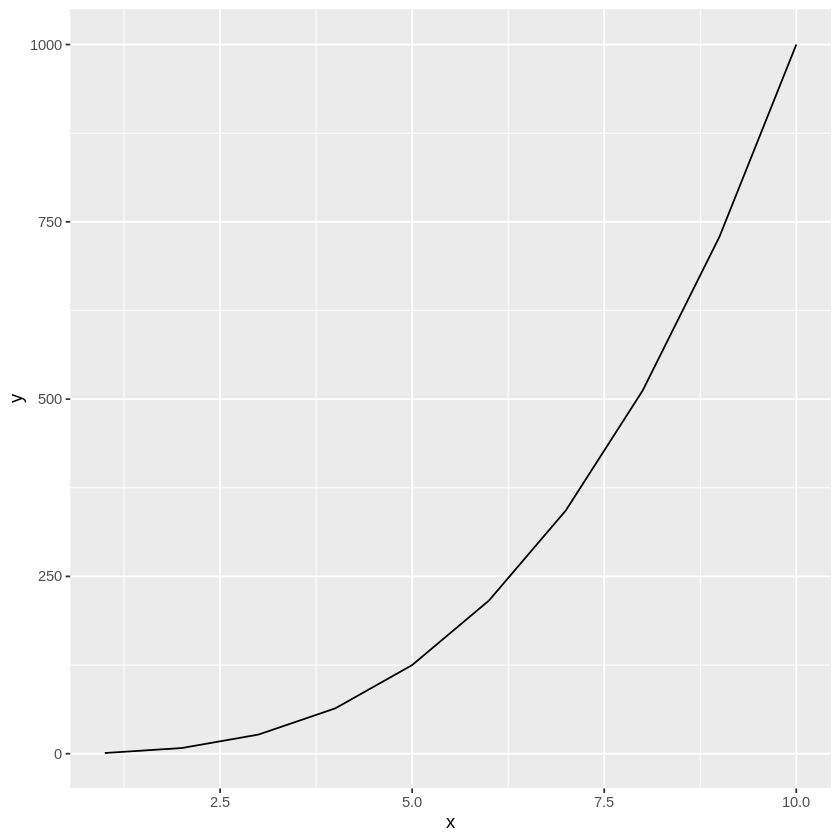

In [ ]:
PlotPower <- function(x, a) {
  plot_data <- 
  tibble(
    x = x,
    y = x^a
  )

ggplot(plot_data, aes(x, y)) +
  geom_line()
}

PlotPower(1:10, 3)

# Question 16

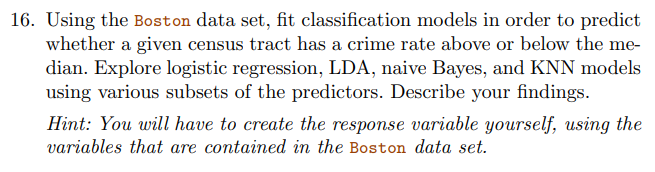

In [ ]:
Boston <- MASS::Boston %>%
   as_tibble() %>%
   mutate(crim01 = ifelse(crim > median(crim),
                          1, 0))

Boston_train <- Boston %>% 
  sample_frac(size = 0.5)

Boston_test <- Boston %>% 
  anti_join(Boston_train)

In [ ]:
Boston

Exploring correlations:

In [ ]:
cor(Boston) %>% 
  corrplot::corrplot()

Trying Logistic Regression:



In [ ]:
predictors <-
  list(
    predictors_1 = "crim01 ~ zn + indus + nox + age + dis + rad + tax + black + lstat",
    predictors_2 = "crim01 ~ zn + indus + nox + age + dis + rad + tax + lstat",
    predictors_3 = "crim01 ~ indus + nox + rm + age + dis + rad + tax + black + lstat + medv"
  ) %>%
  map(as.formula)

reg_boston <- tibble(
  variables = predictors,
  models = map(predictors, ~glm(., family = "binomial", data = Boston_train)),
  predictions = map(models, ~predict(., newdata = Boston_test, type = "response")),
  predicted_class = map(predictions, ~ifelse(. > 0.5, 1, 0)),
  confusion_matrix = map(predicted_class, ~caret::confusionMatrix(data = factor(.), 
                                                                  reference = factor(Boston_test[["crim01"]])))
)

In [ ]:
reg_boston[["confusion_matrix"]]


The first set of variables seems to have the lowest test error rate.



Linear Discriminant Analysis:



In [ ]:
lda_boston <- tibble(
  variables = predictors,
  models = map(predictors, ~ lda(., data = Boston_train)),
  predictions = map(models, ~ predict(., newdata = Boston_test)[["class"]]),
  confusion_matrix = map(
    predictions,
    ~ caret::confusionMatrix(data = .,
                             reference = factor(Boston_test[["crim01"]]))
  )
)

lda_boston[["confusion_matrix"]]

Here the second set of variables has the lower test error rate.



KNN (here we’re going to explore different values of K instead of subsets of predictors).



In [ ]:
Boston_train_x <- 
  Boston_train %>% 
  select(zn, indus, nox, age, dis, rad, tax, black, lstat)

Boston_test_x <- 
  Boston_test %>% 
  select(zn, indus, nox, age, dis, rad, tax, black, lstat)

Boston_train_y <- Boston_train[["crim01"]]


knn_boston <- tibble(
  k = 1:15,
  predictions = map(
    k,
    ~ class::knn(k = ., Boston_train_x, Boston_test_x, cl = Boston_train_y)
  ),
  confusion_matrix = map(
    predictions,
    ~ caret::confusionMatrix(data = .,
                             reference = factor(Boston_test[["crim01"]]))
  )
)

knn_boston[["confusion_matrix"]]

KNN with K = 3 beats Logistic Regression and LDA in test error rate, obtaining just 7.9%.

